# Predicting NBA Salaries using a Neural Network

__Goal__: use a deep neural network (`models/nn.py`) to predict NBA players salaries. Dataset (`NBA Player Stats - 4.csv`) collects the following stats for 81 players from 10 teams.

Stats Collected (from 2022-23 season):
- Age
- Draft Position
- Games Started
- Games Played
- Minutes per Game
- Points per Game
- Field Goal Percentage
- 3-Point Percentage
- Free Throw Percentage
- Offensive Rebounds per Game
- Defensive Rebounds per Game
- Assists per Game
- Blocks per Game
- Steals per Game
- Turnovers per Game

In [160]:
import sys
import math
sys.path.append("..")
import numpy as np
import matplotlib.pyplot as plt
from models.nn import NeuralNetwork
import random

Reading Data from CSV (See `NBA Player Stats - 4.csv`)

In [161]:
data_file = open("NBA Player Stats - 4.csv")
data_file.readline()

player_data = []
for line in data_file:
    data = line.split(",")
    for i in range(2, len(data)):
        data[i] = float(data[i])
    player = (data[0:2], np.array(data[2:-1]), np.array(data[-1]))
    player_data.append(player)

Normalizing data

In [162]:
min_vals = player_data[0][1].copy()
max_vals = player_data[0][1].copy()


for player in player_data:
    for i in range(len(player[1])):
        if player[1][i] < min_vals[i]:
            min_vals[i] = player[1][i]
        if player[1][i] > max_vals[i]:
            max_vals[i] = player[1][i]

range_vals = [max_vals[i] - min_vals[i] for i in range(len(min_vals))]

for player in player_data:
    for i in range(len(player[1])):
        player[1][i] = 2 * (player[1][i] - min_vals[i] - range_vals[i] / 2) / range_vals[i]


Shuffling players and dividing into training and testing sets

In [163]:
random.shuffle(player_data)

train_percent = 0.8
train_cutoff = int(len(player_data) * train_percent)
train_data = player_data[0:train_cutoff]
test_data = player_data[train_cutoff:]

train_names = [player[0] for player in train_data]
train_input = [player[1] for player in train_data]
train_salary = [player[2] for player in train_data]
test_names = [player[0] for player in test_data]
test_input = [player[1] for player in test_data]
test_salary = [player[2] for player in test_data]

Define loss function (for training graphs)

In [164]:
def loss(network, d_input, d_output):
    assert len(d_input) == len(d_output)
    predictions = network.predict(d_input)
    n = len(d_input)
    loss = 0
    for i in range(n):
        loss += (predictions[i] - d_output[i]) ** 2
    return math.sqrt(loss / n)

Initialization

Uses four fully connected hidden layers with 30 neurons each.

In [165]:
network = NeuralNetwork(input_dim=len(train_input[0]), hidden_layers=4, layer_sizes=[30, 30, 30, 30])

print("initial training loss", loss(network, train_input, train_salary))
print("initial testing loss", loss(network, test_input, test_salary))

initial training loss 20.36500290747125
initial testing loss 22.62333959948053


Training

training loss 7.522059634203756
testing loss 8.584103254530028


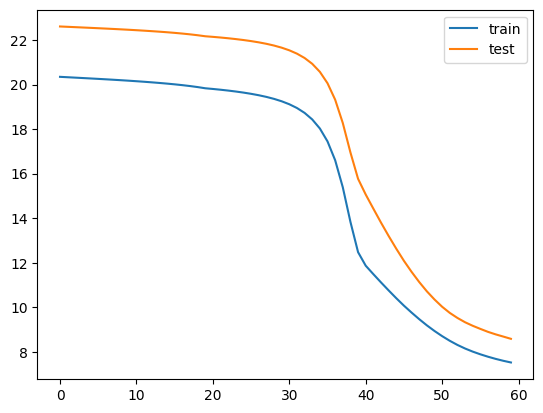

In [166]:
rates = (np.array([0.005, 0.004, 0.003, 0.002, 0.001]), np.array([0.001, 0.0008, 0.0006, 0.0004, 0.0002]))

rounds = 60
train_loss = []
test_loss = []

for i in range(int(rounds / 3)):
    network.train(train_input, train_salary, 2 * rates[0], 2 * rates[1])
    train_loss.append(loss(network, train_input, train_salary))
    test_loss.append(loss(network, test_input, test_salary))

for i in range(2 * int(rounds / 3)):
    network.train(train_input, train_salary, rates[0], rates[1])
    train_loss.append(loss(network, train_input, train_salary))
    test_loss.append(loss(network, test_input, test_salary))

print("training loss", train_loss[-1])
print("testing loss", test_loss[-1])

plt.plot(range(rounds), train_loss, label="train")
plt.plot(range(rounds), test_loss, label="test")
plt.legend()

Showing predictions for testing dataset

In [167]:
predictions = network.predict(test_input)
print("Testing Data Set")
for i in range(len(predictions)):
    print(f"{test_names[i][0]}, {test_names[i][1]} ({round(predictions[i][0] - test_salary[i], 1)}):")
    print(f"\t predicted salary: {round(predictions[i][0], 1)}, actual salary: {test_salary[i]}")

Testing Data Set
Naz Reid, Twolves (4.3):
	 predicted salary: 6.2, actual salary: 1.9
Lauri Markannen, Jazz (14.2):
	 predicted salary: 31.2, actual salary: 17.0
Saddiq Bey, Pistons (4.0):
	 predicted salary: 8.5, actual salary: 4.5
Anthony Davis, Lakers (-7.5):
	 predicted salary: 33.1, actual salary: 40.6
Anthony Edwards, Twolves (19.9):
	 predicted salary: 33.4, actual salary: 13.5
Walker Kessler, Jazz (4.1):
	 predicted salary: 6.9, actual salary: 2.8
Lebron James, Lakers (-6.7):
	 predicted salary: 46.7, actual salary: 53.4
Julius Randle, Knicks (12.7):
	 predicted salary: 38.3, actual salary: 25.6
Pat Connaughton, Bucks (-2.5):
	 predicted salary: 6.9, actual salary: 9.4
Austin Rivers, Twolves (4.6):
	 predicted salary: 6.4, actual salary: 1.8
Jeff Green, Nuggets (2.9):
	 predicted salary: 7.4, actual salary: 4.5
Jevon Carter, Bucks (3.4):
	 predicted salary: 5.6, actual salary: 2.2
Paolo Banchero, Magic (15.2):
	 predicted salary: 26.8, actual salary: 11.6
Ochai Agbaji, Jazz (2.

Overfitting a small training set

training loss 0.11982260444137681
testing loss 9.816792657865479
Training Data Set
Giannis Antetokounmpo, Bucks (0.0):
	 predicted salary: 45.6, actual salary: 45.6
Franz Wagner, Magic (0.3):
	 predicted salary: 5.8, actual salary: 5.5
Kentavious Caldwell-Pope, Nuggets (0.1):
	 predicted salary: 14.8, actual salary: 14.7
Mitchell Robinson, Knicks (-0.0):
	 predicted salary: 15.7, actual salary: 15.7
Kevon Looney, Warriors (0.0):
	 predicted salary: 8.5, actual salary: 8.5
Jonathan Kuminga, Warriors (-0.2):
	 predicted salary: 5.8, actual salary: 6.0
Bobby Portis, Bucks (0.0):
	 predicted salary: 11.7, actual salary: 11.7
Robert Williams, Celtics (0.0):
	 predicted salary: 11.8, actual salary: 11.8
RJ Barrett, Knicks (-0.1):
	 predicted salary: 23.8, actual salary: 23.9
Gary Harris, Magic (0.0):
	 predicted salary: 13.0, actual salary: 13.0
Jrue Holiday, Bucks (-0.2):
	 predicted salary: 36.0, actual salary: 36.2
Bruce Brown, Nuggets (0.2):
	 predicted salary: 7.0, actual salary: 6.8
Gr

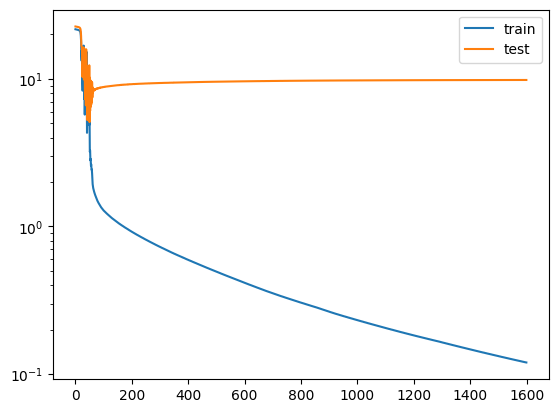

In [170]:
network = NeuralNetwork(input_dim=len(train_input[0]), hidden_layers=4, layer_sizes=[30, 30, 30, 30])
rates = (np.array([0.01, 0.07, 0.004, 0.002, 0.001]), np.array([0.001, 0.0008, 0.0006, 0.0004, 0.0002]))

rounds = 10
eras = 10
train_small_loss = []
test_loss = []
num = 20
mult = 1.5

for i in range(eras):
    for j in range(rounds):
        network.train(train_input[0:num], train_salary[0:num], mult * rates[0], mult * rates[1])
        train_small_loss.append(loss(network, train_input[0:num], train_salary[0:num]))
        test_loss.append(loss(network, test_input, test_salary))
    mult *= 0.80

for i in range(3 * eras):
    for j in range(5 * rounds):
        network.train(train_input[0:num], train_salary[0:num], mult * rates[0], mult * rates[1])
        train_small_loss.append(loss(network, train_input[0:num], train_salary[0:num]))
        test_loss.append(loss(network, test_input, test_salary))
    mult *= .98

# mult *= 1.5


print("training loss", train_small_loss[-1])
print("testing loss", test_loss[-1])

plt.plot(range(len(train_small_loss)), train_small_loss, label="train")
plt.plot(range(len(test_loss)), test_loss, label="test")
plt.yscale("log")
plt.legend()

predictions = network.predict(train_input[0:num])
print("Training Data Set")
for i in range(num):
    print(f"{train_names[i][0]}, {train_names[i][1]} ({round(predictions[i][0] - train_salary[i], 1)}):")
    print(f"\t predicted salary: {round(predictions[i][0], 1)}, actual salary: {train_salary[i]}")